In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import cv2
from PIL import Image
from numpy import asarray
import skimage
from skimage import data, draw, io
import random
import time


# We will upload the models of the identfy of the elephants

In [ ]:
!wget 'https://firebasestorage.googleapis.com/v0/b/eleproje.appspot.com/o/model_label.h5?alt=media&token=a8988b53-73d2-4b5e-8ba5-03f599780fe0' -O model_label.h5
       
!wget 'https://firebasestorage.googleapis.com/v0/b/eleproje.appspot.com/o/model_lapetit.h5?alt=media&token=3fb4ab73-d9f4-4640-b5c7-7adbdd51b2c7' -O model_lapetit.h5

!wget 'https://firebasestorage.googleapis.com/v0/b/eleproje.appspot.com/o/model_lola_copy.h5?alt=media&token=9541a2d1-04aa-464f-b095-b5b3672997c9' -O model_lola.h5

!wget 'https://firebasestorage.googleapis.com/v0/b/eleproje.appspot.com/o/model_latangi_copy.h5?alt=media&token=b7121413-5005-416a-88a6-a4569c74bff0' -O model_latangi.h5


--2022-06-22 08:00:14--  https://firebasestorage.googleapis.com/v0/b/eleproje.appspot.com/o/model_label.h5?alt=media&token=a8988b53-73d2-4b5e-8ba5-03f599780fe0
Resolving firebasestorage.googleapis.com (firebasestorage.googleapis.com)... 108.177.97.95, 2404:6800:4008:c04::5f
Connecting to firebasestorage.googleapis.com (firebasestorage.googleapis.com)|108.177.97.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16920008 (16M) [application/octet-stream]
Saving to: ‘model_label.h5’

model_label.h5      100%[===================>]  16.14M  25.6MB/s    in 0.6s    

2022-06-22 08:00:17 (25.6 MB/s) - ‘model_label.h5’ saved [16920008/16920008]

--2022-06-22 08:00:18--  https://firebasestorage.googleapis.com/v0/b/eleproje.appspot.com/o/model_lapetit.h5?alt=media&token=3fb4ab73-d9f4-4640-b5c7-7adbdd51b2c7
Resolving firebasestorage.googleapis.com (firebasestorage.googleapis.com)... 108.177.97.95, 2404:6800:4008:c00::5f
Connecting to firebasestorage.googleapis.com (fireba

In [ ]:
model_lapetit = tf.keras.models.load_model('model_lapetit.h5')  
                                                
model_lola = tf.keras.models.load_model('model_lola.h5') 

model_label = tf.keras.models.load_model('model_label.h5')

model_latangi = tf.keras.models.load_model('model_latangi.h5') 

# Upload the image you want to predict

In [ ]:
#image from the server 
!wget 'https://firebasestorage.googleapis.com/v0/b/eleproje.appspot.com/o/test_images%2Flatangi.jpeg?alt=media&token=d9d45865-3a6f-48c8-90ed-51c175a01413' -O test.jpg
image = cv2.imread('test.jpg')


--2022-06-22 08:00:43--  https://firebasestorage.googleapis.com/v0/b/eleproje.appspot.com/o/test_images%2Flatangi.jpeg?alt=media&token=d9d45865-3a6f-48c8-90ed-51c175a01413
Resolving firebasestorage.googleapis.com (firebasestorage.googleapis.com)... 64.233.189.95, 2404:6800:4008:c00::5f
Connecting to firebasestorage.googleapis.com (firebasestorage.googleapis.com)|64.233.189.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119271 (116K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 116.48K  --.-KB/s    in 0.002s  

2022-06-22 08:00:44 (69.9 MB/s) - ‘test.jpg’ saved [119271/119271]



In [ ]:
#uplaod elephant image
plt.figure(figsize=(20,10))
#image = cv2.imread("latangi.jpg")
image = cv2.imread("test.jpg")
#image = cv2.imread("lola.jpeg")
#image = cv2.imread("label.jpg")
#image = cv2.imread("test1.jpg")



<Figure size 1440x720 with 0 Axes>

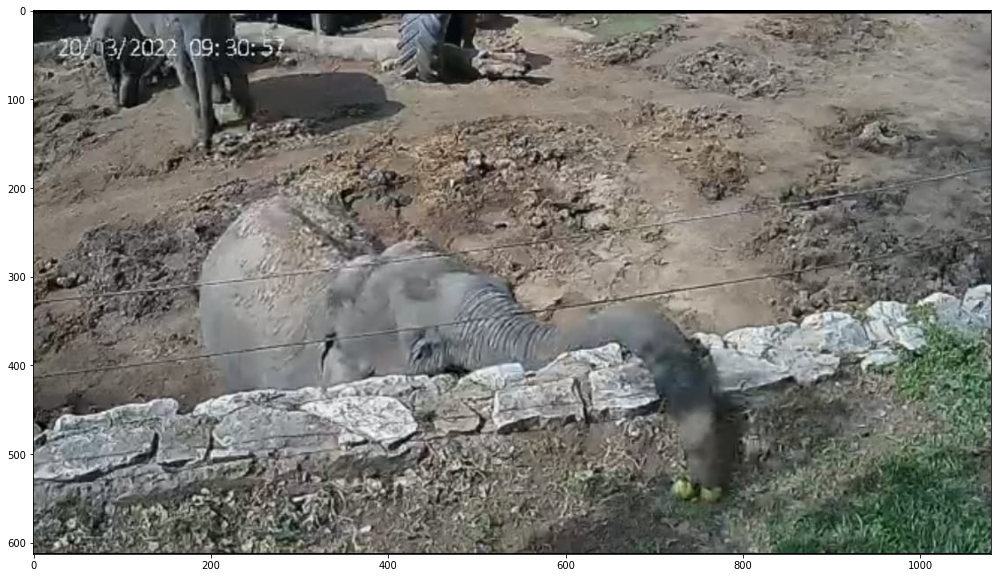

In [ ]:
plt.figure(figsize=(20,10))
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

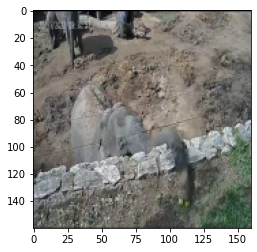

In [ ]:
dim = (160 ,160)
image160 = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
image160.shape
plt.imshow(image160)

(160, 160, 3)


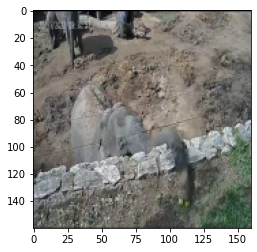

In [ ]:
image160.astype("float32")
plt.imshow(image160)
print(image160.shape)

In [ ]:
def get_from_the_large_image_test_set(large_image): 
  
  l = []
  print(large_image.__class__)
  if(large_image.__class__ is not  list):
    l.append(large_image)
    return np.asarray(l)
 
  for i in large_image:
    l.append(i)

  return np.asarray(l)

## Predicte the image label

In [ ]:
#Define elephants flag
lapetit_flag = 0
lola_flag = 0
latangi_flag = 0
label_flag = 0 
# Define the elephant delay 
lapetit_delay = 0
lola_delay = 0
latangi_delay = 0
label_delay = 0
#Define timers
Timer_lapetit = True
Timer_lola    = True
Timer_latangi = True
Timer_label   = True


In [ ]:
# image160.astype("uint8")
i = get_from_the_large_image_test_set(image160)
i.shape

<class 'numpy.ndarray'>


(1, 160, 160, 3)

In [ ]:
predict_lapetit = model_lapetit.predict(i)
print(predict_lapetit)

predict_lola = model_lola.predict(i)
print(predict_lola)

predict_label = model_label.predict(i)
print(predict_label)

predict_latangi = model_latangi.predict(i)
print(predict_latangi)

[[12.596069]]
[[6.451389]]
[[0.03060089]]
[[-10.744306]]


In [ ]:
predictions_lapetit = tf.nn.sigmoid(predict_lapetit)
predictions_lapetit = tf.where(predictions_lapetit < 0.5, 0, 1)

predictions_lola = tf.nn.sigmoid(predict_lola)
predictions_lola = tf.where(predictions_lola < 0.5, 0, 1)

predictions_label = tf.nn.sigmoid(predict_label)
predictions_label = tf.where(predictions_label < 0.5, 0, 1)

predictions_latangi = tf.nn.sigmoid(predict_latangi)
predictions_latangi = tf.where(predict_latangi < 0.5, 0, 1)


if predictions_lapetit == 0:
  lapetit_flag += 1
  print('The elephant is Lapetit')
elif predictions_lola == 0:
  lola_flag += 1
  print ('The elephant is Lola')
elif predictions_label == 0:
  label_flag += 1
  print ('The elephant is Label')
elif predictions_latangi == 0:
  latangi_flag += 1
  print ('The elephant is Latangi')
else :
  print ('The system doesnt recognize the elephant')



The elephant is Latangi


In [ ]:
# Check if the ditected elephant touches more then 1 time.
if lapetit_flag == 2:
  time.sleep(15) # Timer 15 min
  lapetit_flag = 0
elif lola_flag == 2:
  time.sleep(15)
  lola_delay = 1
  lola_flag = 0 
elif latangi_flag == 2:
  time.sleep(15)
  latangi_delay = 1
  latangi_flag = 0
elif label_flag == 2:
  time.sleep(15)
  label_delay = 1
  label_flag = 0


 



In [ ]:
lapetit_flag

1

##Random shape

In [ ]:
#Create random numaber to create random shape

def random_shape():
  smallest = 1500
  largest = 9999
  random_number = random.randint(smallest, largest - 1)





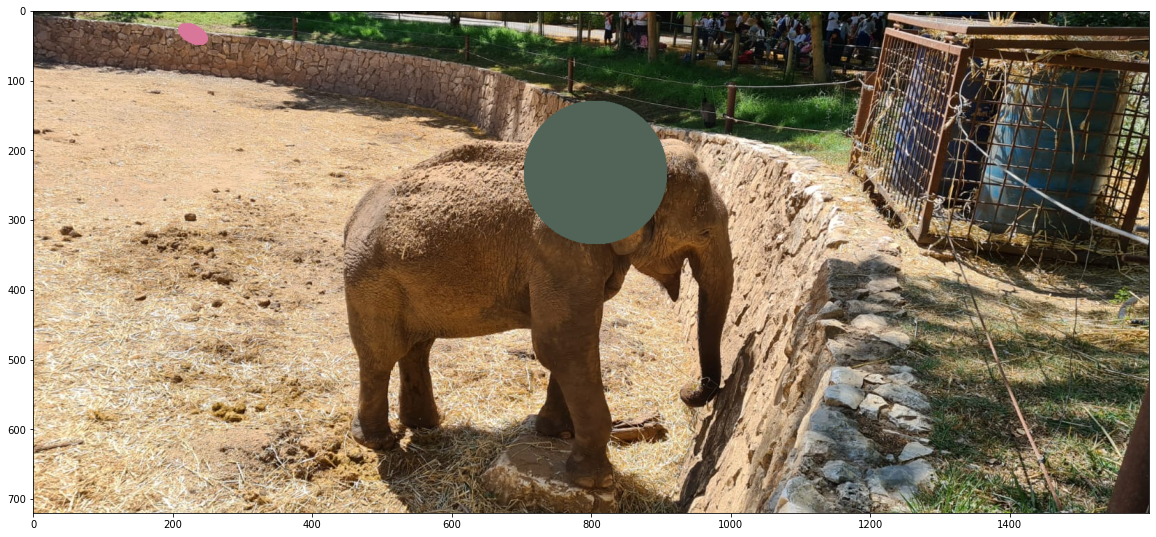

In [ ]:
image_1_randim, labels = draw.random_shapes(image.shape, max_shapes=3, min_size=5, 
                                             multichannel=True,
                                             allow_overlap=True,
                                             random_seed= random_shape())
plt.figure(figsize=(20,10))

image_1 = image.copy()

image_1 = np.where(image_1_randim==255, image_1, image_1_randim)

plt.imshow(image_1)



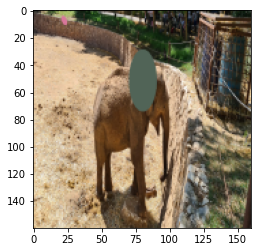

In [ ]:
dim = (160 ,160)
image160_1 = cv2.resize(image_1, dim, interpolation = cv2.INTER_AREA)
image160_1.shape
plt.imshow(image160_1)

(160, 160, 3)


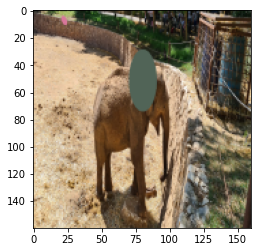

In [ ]:
image160_1.astype("float32")
plt.imshow(image160_1)
print(image160_1.shape)

In [ ]:
# image160.astype("uint8")
i = get_from_the_large_image_test_set(image160_1)
i.shape

<class 'numpy.ndarray'>


(1, 160, 160, 3)

In [ ]:
predict_lapetit = model_lapetit.predict(i)  
print(predict_lapetit)

predict_lola = model_lola.predict(i)
print(predict_lola)

predict_label = model_label.predict(i)
print(predict_label)

predict_latangi = model_latangi.predict(i)
print(predict_latangi)

[[-2.900039]]
[[6.504465]]
[[4.5890117]]
[[16.568682]]


In [ ]:
predictions_lapetit = tf.nn.sigmoid(predict_lapetit)
predictions_lapetit = tf.where(predictions_lapetit < 0.5, 0, 1)

predictions_lola = tf.nn.sigmoid(predict_lola)
predictions_lola = tf.where(predictions_lola < 0.5, 0, 1)

predictions_label = tf.nn.sigmoid(predict_label)
predictions_label = tf.where(predictions_label < 0.5, 0, 1)

predictions_latangi = tf.nn.sigmoid(predict_latangi)
predictions_latangi = tf.where(predict_latangi < 0.5, 0, 1)


if predictions_lapetit == 0:
  print('The elephant is Lapetit')
elif predictions_lola == 0:
  print ('The elephant is Lola')
elif predictions_label == 0:
  print ('The elephant is Label')
elif predictions_latangi == 0:
  print ('The elephant is Latangi')
else :
  print ('The system doesnt recognize the elephant')

The elephant is Lapetit


## Predicte 9 images with random flip.

<class 'list'>


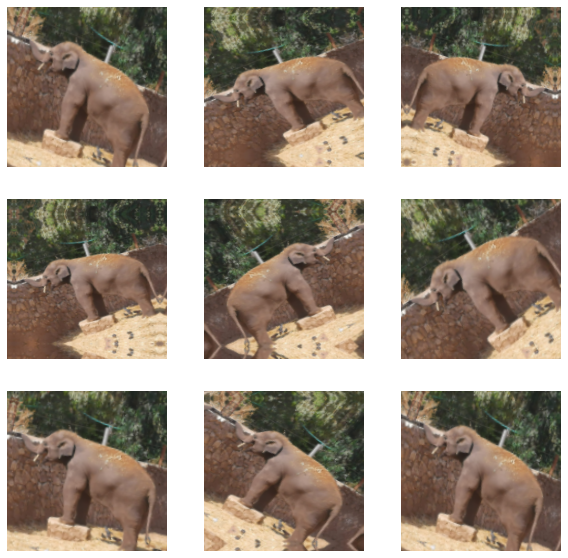

In [ ]:
data_augmentation1 = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(.3, .1)
])

ll = []
plt.figure(figsize=(10, 10))
first_image = image160 
for j in range(9):
  ax = plt.subplot(3, 3, j + 1)
  augmented_image1 = data_augmentation1(tf.expand_dims(first_image, 0))
  ll.append(augmented_image1[0])
  plt.imshow(ll[j].numpy().astype("uint8"))
  plt.axis('off')

plt.imshow(ll[0].numpy().astype("uint8"))

i = get_from_the_large_image_test_set(ll)


In [ ]:
predict_lapetit = model_lapetit.predict(i)  
print(predict_lapetit)

predict_lola = model_lola.predict(i)
print(predict_lola)

predict_label = model_label.predict(i)
print(predict_label)

predict_latangi = model_latangi.predict(i)
print(predict_latangi)

In [ ]:
predictions_lapetit = tf.nn.sigmoid(predict_lapetit)
predictions_lapetit = tf.where(predictions_lapetit < 0.5, 0, 1)

predictions_lola = tf.nn.sigmoid(predict_lola)
predictions_lola = tf.where(predictions_lola < 0.5, 0, 1)

predictions_label = tf.nn.sigmoid(predict_label)
predictions_label = tf.where(predictions_label < 0.5, 0, 1)

predictions_latangi = tf.nn.sigmoid(predict_latangi)
predictions_latangi = tf.where(predict_latangi < 0.5, 0, 1)

for x in predictions_lapetit:
  if x == 0:
    print('The elephant is Lapetit')
  elif x == 1:
    for y in predictions_lola:
      if y == 0:
        print('The elephant is Lola')
      elif y == 1:
        for z in predictions_label:
          elif z == 0:
            print('The elephant is Label')
          if z ==1:
            for q in predictions_latangi:
              print('The elephant is Latangi')
          else :
            print ('The system doesnt recognize the elephant')
            



    




    

 



SyntaxError: ignored